## Testing Jupyter Collab

In [18]:
# Please print somethin here so i can confirm if you can also edit :)



# Testing modules
Through testing the modules in the following code, i would be able to see if the program can fully run like it would in Google Colab

In [1]:
!which python

'which' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!python -c 'import torch; device = torch.device("cuda" if torch.cuda.is_available() else "cpu"); print(device)'

  File "<string>", line 1
    'import
    ^
SyntaxError: unterminated string literal (detected at line 1)


In [7]:
!pip list

Package                   Version
------------------------- --------------
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.6.2
cffi                      1.16.0
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
dill                      0.3.8
executing                 2.0.1
fastjsonschema            2.19.1
filelock                  3.15.1
fonttools                 4.53.0
fqdn                      1.5.1
fsspec                    2024.6.0
h11                       0.14.0
httpcore    


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd #This works and it is updated
print(pd.__version__)

2.2.2


In [9]:
import matplotlib
print(matplotlib.__version__)

3.9.0


In [10]:
import seaborn as sns
print(sns.__version__)

0.13.2


In [11]:
import tqdm as tqdm
print(tqdm.__version__)

4.66.4


In [12]:
# Able to run, cannot print out version however use pip list on terminal
from sklearn.utils import resample 

In [13]:
from tqdm import tqdm #works

In [14]:
from transformers import ViTForImageClassification #works

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [15]:
from imblearn.over_sampling import SMOTE #works

In [16]:
import plotly.graph_objects as go #works

## Testing out if files match filepath (dataset column fpath)

In [17]:
file_path = '/mnt/data/medical_img/task1_development_starting_kit/train_labeled.csv'
all_xray_df = pd.read_csv(file_path)

print(all_xray_df['fpath'])

# Use the parent directory of the 'p10' subdirectory as the image_dir
image_dir = '/mnt/data/medical_img/files'

test_dataset = ChestXrayDataset(dataframe=all_xray_df, image_dir=image_dir, transform=transform, oversample=False)

for idx in range(len(test_dataset)):
    test_dataset[idx]

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/medical_img/task1_development_starting_kit/train_labeled.csv'

## Connecting to the SSH Server - examples from Dr. Liu

In [33]:
#Getting the filepath of trained_dataset, importing to jupyter (sample size: 10,000)
file_path = '/mnt/data/medical_img/task1_development_starting_kit/train_labeled.csv'
data = pd.read_csv(file_path, nrows = 10000)

#Checking dimensions of dataset 
print(len(data)) # number of rows 
print(len(data.columns)) # number of columns 
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/medical_img/task1_development_starting_kit/train_labeled.csv'

In [34]:
# !ls
# !pwd
!ls /mnt/data/medical_img
input_dir = '/mnt/data/medical_img/files/p10/'
csv_dir = '/mnt/data/medical_img/task1_development_starting_kit/train_labeled.csv'
print(csv_dir)

/mnt/data/medical_img/task1_development_starting_kit/train_labeled.csv


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [21]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

In [35]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.



CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5839%2F18613%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240521%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240521T210027Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D69d6fc07e731dd3e085abb632214c96373994fae5cbd241eff2cc83e43d83acd4821b22e6af8ff52fbca206ddd4d3161b0f0c2093fe3a484fc4cab88329ab00e99da6d2ef461b486bb07471026454af0697675ec8862fb3ee72dbcce03a061159898ce23318736341982cb31423ef00be07cfecd7cdc2172278d3e2431853d53aefd0e80a664a514e6be2d6241d15e5aa52cb313e80430e73e72f88ed441ad1bb9784d76ac2e357bcce4bc2f6f52d4d5da97efecd013657bf77742dd197879cc640aee4c3c665de520dbf50bdd2b9e3f40e4fc1076a559f148b0d5cf9f54b35ee153715e5b01208c09f264796956cf28fec33fa1108747c24c0d7c7d21816fc8,chestxray8-dataframe:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F728891%2F1327979%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240521%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240521T210027Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0db44203b4abfd44bf56a10d3af568dfde02bbff5a36a73ae694760aadae5f679e6d2bf2bd85cf16d742799ee8ba2237124e5d7bbc292aa8c3ba639e28fa40a222e7c3cb5612f09fa3cf2fecd1722bf4cf75915987b5344445f932ac1fcaaf4a3db2afc619931fd3c348e81f4de97b0e2d2d71fc348f5f946ca1f7f56d4ee08e9003bd0d4d18a0b6129de130181f21e41df33fc9bf7746b7107fd5db61f47b75e703fddac474931482a58afe5beac81ffb115d1b49cc8b7a26eac31616381bc8289a7f758e551450679c32eae9da792092c1ee1d10dbf989bb666b9888661478dad4518c8c607cc59e60e8fa0de62b7b1ee371f09e5b640c758f95526eb7f86f,nih-chest-xray-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F982349%2F1659318%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240521%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240521T210027Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1cb2a4d6e5a758bca83e23fd6338ecd089c64f402ad5cc6efc2d672650170e4c7108a1c8440f857d8be7009cc7a19ee5e37548621e1dcb8219159c21efbf7573038d24d34c790329caf708ba880a64d82b8c3c032c1337ef5f5520288a2f737cc2665d9c90c4244f6a27cceaea0f4f79afe545917a447656c96acf89dfd7197203e849e7718313fafe2a011618889ad5981634b7b9965950eb9bdee9293fe265014bab8fe9a180eadd29248c71099dac4bc4ecffc0c2bef34df1f37f8bda2e8df3cb6f669e8aeaf6e947fadd54da857883637c25fb3f826a090638b225c2c624ff0712a239b3875d8e104394c9e6cf937de0273612a6a2ddc8c78e210145abba'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


The system cannot find the path specified.


OSError: [WinError 1314] A required privilege is not held by the client: '/kaggle/input' -> '..\\input'

# Chest X-Ray Medical Diagnosis with Deep Learning

<a name='1'></a>
## 1. Import Packages and Functions¶



In [37]:
print(device)

NameError: name 'device' is not defined

In [225]:
# !conda list
!nvidia-smi


Tue Jun 11 12:29:09 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.67                 Driver Version: 550.67         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        Off |   00000000:0B:00.0 Off |                  Off |
| 60%   26C    P8              6W /  450W |     208MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [36]:
import torch


ModuleNotFoundError: No module named 'torch'

In [6]:
print(torch.__version__)

print(torch.cuda.current_device())

NameError: name 'torch' is not defined

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir
from os.path import join, isfile, isdir
from glob import glob



from PIL import Image
sns.set()
from tqdm import tqdm
%matplotlib inline


ModuleNotFoundError: No module named 'numpy'

In [20]:
from transformers import ViTFeatureExtractor

ModuleNotFoundError: No module named 'transformers'

In [21]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [8]:
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'plotly'

In [7]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, models
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from PIL import Image
from transformers import ViTForImageClassification
from collections import Counter


/home/rachel/miniconda3/envs/rachel_mi/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#
# **Data Management**
Data Management: The code loads multiple datasets from CSV files and refines them by removing irrelevant columns. It handles the datasets to prepare them for analysis by adjusting their structure.
File Management: It sets up directory paths and uses them to compile a list of image file paths for processing, demonstrating how the data is organized and accessed.
Data Analysis Preparation: Basic statistics about the image files and dataset composition are computed and displayed to provide insights into the dataset's scope and content.
This description offers a high-level overview of the tasks performed in the code, covering data handling, file management, and initial data analysis setup.

In [6]:

# load the dataset from the specified file path
file_path = '/mnt/data/medical_img/task1_development_starting_kit/train_labeled.csv'
all_xray_df = pd.read_csv(file_path)


# identify columns that do not contain labels
non_label_columns = ['dicom_id', 'subject_id', 'fpath']

# extract columns containing labels
label_columns = [col for col in all_xray_df.columns if col not in non_label_columns]
labels = all_xray_df[label_columns].apply(pd.to_numeric, errors='coerce').fillna(0).values

# checking the shape 
print(f"Labels shape: {labels.shape}")
assert labels.shape[1] == 43, f"Expected 43 labels but found {labels.shape[1]}"

# getting the file paths from the 'fpath' column
all_xray_df['file_paths'] =  '/mnt/data/medical_img/' + all_xray_df['fpath']


all_xray_df.head()

NameError: name 'pd' is not defined

In [192]:
all_image_paths = [] 

file_paths_list = all_xray_df['file_paths'].tolist()

for full_path in file_paths_list:
    if Path(full_path).exists():
        all_image_paths.append(str(full_path))


In [195]:
# check the lengths of labels and image paths to make sure they match
print(f"Number of labels: {len(labels)}")
print(f"Number of existing image paths: {len(all_image_paths)}")

Number of labels: 258871
Number of existing image paths: 258871


In [196]:
all_xray_df.shape

(258871, 47)

This code snippet randomly samples 5000 rows from a DataFrame named all_xray_df. It uses a fixed random seed (random_state=42) to ensure the reproducibility of the sample across different runs. The commented line shows an alternative approach, where the first 5000 rows could be directly selected from the DataFrame, although this approach is currently inactive.

Minority Class Identification: It defines specific classes as minorities based on their occurrence within the dataset.
Oversampling: For each minority class, it filters the dataset to obtain only the entries of that class, then oversamples these entries to increase their representation to a predefined target size.
Data Integration and Shuffling: The oversampled data is then integrated back into the original dataset, and the combined dataset is shuffled to ensure a uniform distribution of all classes.

#### Determing minority class for the code cell below (seperate, trainkit dataset from server).

If minority class samples are present in the actual dataset then the code will detect the presence of the minority class samples by checking if the sum of rows with a value of 1 is greater than 0 for any specific classes. It would then proceed to oversampling process with the dataset and the combined datasets would be shuffled. 

If NO minority class samples are pesent, it would print out 'no minority classes foun with samples', proceeding to the non-modified dataset and would be assigned to 'combined_data without any oversampling **Note to Self: renme the combined_data**

In [197]:
'''I think it still needs a work in progress -- need to doble check if oversampling'''
import pandas as pd
from sklearn.utils import resample

# load the dataframe from file path 
all_xray_df = pd.read_csv('/mnt/data/medical_img/task1_development_starting_kit/train_labeled.csv')

# define the minority classes for oversampling
minority_classes = ['Hernia', 'Fibrosis', 'Pneumonia']

# check if any minority class has at least one sample
has_minority_samples = False
for class_name in minority_classes:
    class_count = (all_xray_df[class_name] == '1').sum()
    if class_count > 0:
        has_minority_samples = True
        break

if has_minority_samples:
    # filter the dataset for minority classes and oversample them
    oversampled_dfs = []
    for class_name in minority_classes:
        # filter the dataframe for the current class
        class_df = all_xray_df[all_xray_df[class_name] == '1']
        class_count = len(class_df)

        # check if the class has at least one sample
        if class_count > 0:
            # convert the dataframe to a numpy array
            class_array = class_df.values

            # oversample the array
            oversampled_array = resample(class_array,
                                         replace=True,
                                         n_samples=class_count,
                                         random_state=123)

            # convert the oversampled array back to a dataframe
            oversampled_df = pd.DataFrame(oversampled_array, columns=class_df.columns)

            oversampled_dfs.append(oversampled_df)
        else:
            print(f"Warning: Class '{class_name}' has no samples. Skipping oversampling.")

    # concatenate the oversampled dataframes with the original dataframe
    oversampled_data = pd.concat(oversampled_dfs, axis=0)
    combined_data = pd.concat([all_xray_df, oversampled_data])

    # shuffle the combined dataset to mix the oversampled data thoroughly
    combined_data = combined_data.sample(frac=1).reset_index(drop=True)
else:
    print("No minority classes found with samples. Proceeding with the original dataset.")
    combined_data = all_xray_df

No minority classes found with samples. Proceeding with the original dataset.


In [198]:
import torchvision.models as models

def get_model(model_name, num_labels):
    if model_name == 'resnet50':
        model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_labels)
    elif model_name == 'densenet121':
        model = models.densenet121(weights=models.DenseNet121_Weights.IMAGENET1K_V1)
        num_ftrs = model.classifier.in_features
        model.classifier = nn.Linear(num_ftrs, num_labels)
    elif model_name == 'vgg16':
        model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
        num_ftrs = model.classifier[6].in_features
        model.classifier[6] = nn.Linear(num_ftrs, num_labels)
    elif model_name == 'vit':
        model = models.vit_b_16(weights=models.ViT_B_16_Weights.IMAGENET1K_V1)
        num_ftrs = model.heads.head.in_features
        model.heads.head = nn.Linear(num_ftrs, num_labels)
    else:
        raise ValueError("Invalid model name. Choose 'resnet50', 'densenet121', 'vgg16', or 'vit'.")
    return model

In [199]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import models, transforms
from sklearn.metrics import roc_auc_score
import numpy as np
import os

Library Imports and Setup: It imports necessary libraries and modules for image processing, dataset manipulation, and oversampling techniques.
Transformation Setup: A function get_transforms is defined to return appropriate image preprocessing transformations based on the specified model. For a Vision Transformer (ViT), it uses a pretrained feature extractor, while for other models, it applies standard transformations like resizing, tensor conversion, and normalization.
Custom Dataset Class: The ChestXrayDataset class inherits from torch.utils.data.Dataset and includes:
Initialization with options for dataframe management, image directory, transformation application, and oversampling.
Methods to load and transform images based on model requirements.
An optional method for hybrid oversampling of minority classes and undersampling of majority classes based on the median sample count, which helps in balancing the dataset.
Hybrid Class Balancing: Inside the class, the hybrid_oversample_minority_classes method manages class imbalances by adjusting the number of samples for each condition to the median across all conditions, combining both oversampling and undersampling strategies.

In [200]:
class ChestXrayDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels  # Update labels to match the reduced dataset
        self.transform = transform

    # Print the lengths
        print(f"Length of image_paths: {len(self.image_paths)}")
        print(f"Length of labels: {len(self.labels)}")
        print(f"Length of dataset: {len(dataset)}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]
        return image, label

def custom_collate_fn(batch):
     # separate the images and labels from the batch
    images, labels = zip(*batch)
    # stack the images into a tensor
    images = torch.stack(images)
    # convert the labels to float tensors and stack them
    labels = torch.stack([torch.tensor(label, dtype=torch.float32) for label in labels])
    # return the stacked images and labels
    return images, labels

This code defines a sequence of image transformations using PyTorch's transforms module, intended for pre-processing images before they are input into a neural network:

Resize: Images are first resized to 256x256 pixels. This resizing ensures that the subsequent random cropping operation has enough context for any part of the image.
RandomCrop: A 224x224 pixel crop is randomly selected from the resized image. This step adds variability to the input images, which can be beneficial for training robust models.
RandomHorizontalFlip: This transformation randomly flips the image horizontally with a default 50% chance. This augmentation technique helps in generalizing the model by simulating different perspectives.
ToTensor: Converts the PIL image to a PyTorch tensor, which is a required format for input into PyTorch models.
Normalize: Standardizes the pixel values in the image by subtracting the mean and dividing by the standard deviation for each color channel. The values provided are typical means and standard deviations used for pre-trained models on the ImageNet dataset.
These transformations are combined into a transformation pipeline (Compose), which is applied sequentially to each image during data loading. This approach is common in preparing images for deep learning tasks to introduce variability and normalize input data.

In [201]:
transform = transforms.Compose([
    # resize the image to 256x256 to ensure RandomCrop can work
    transforms.Resize(256),
    
    # randomly crop the image to 224x224
    transforms.RandomCrop(224),
    
    # randomly flip the image horizontally
    transforms.RandomHorizontalFlip(),
    
    # convert the image to a PyTorch tensor
    transforms.ToTensor(),
    
    # normalize the image using mean and standard deviation values for ImageNet
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

Dataset Creation: An instance of the ChestXrayDataset class is created, utilizing the all_xray_df DataFrame and an empty string for the image_dir, indicating that the image directory needs to be specified. The transform parameter applies a series of image transformations prepared earlier, and oversample=True enables the class to balance the dataset by oversampling minority classes.
Dataset Splitting:
The dataset is split into training and validation sets based on an 80/20 split. The train_size is calculated as 80% of the total number of samples in the dataset, and val_size is the remaining 20%.
The random_split function from PyTorch's utilities is used to randomly divide the dataset into these two subsets, ensuring a mixture of data points in both the training and validation sets.
Data Loaders:
DataLoader objects are created for both the training and validation datasets. These loaders handle the batching of the dataset samples, which is set to 16 images per batch.
The training loader is configured to shuffle the data (shuffle=True) to promote randomness and better generalization during training. The validation loader does not shuffle data (shuffle=False), as the order does not affect validation performance but can aid in consistent evaluation.
num_workers=4 specifies that four worker processes will be used to load the data, which can help in speeding up data loading operations.

In [202]:
# create the dataset
dataset = ChestXrayDataset(all_image_paths, labels, transform=transform)

# splitting the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# create the DataLoader with the custom collate function
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True, num_workers=4, collate_fn=custom_collate_fn)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False, num_workers=4, collate_fn=custom_collate_fn)

Length of image_paths: 258871
Length of labels: 258871
Length of dataset: 1000


### Analyzing the class distribution for the dataset

Column 'study_id' contains non-binary values and will be excluded.
Column 'ViewPosition' contains non-binary values and will be excluded.
Column 'ViewCodeSequence_CodeMeaning' contains non-binary values and will be excluded.


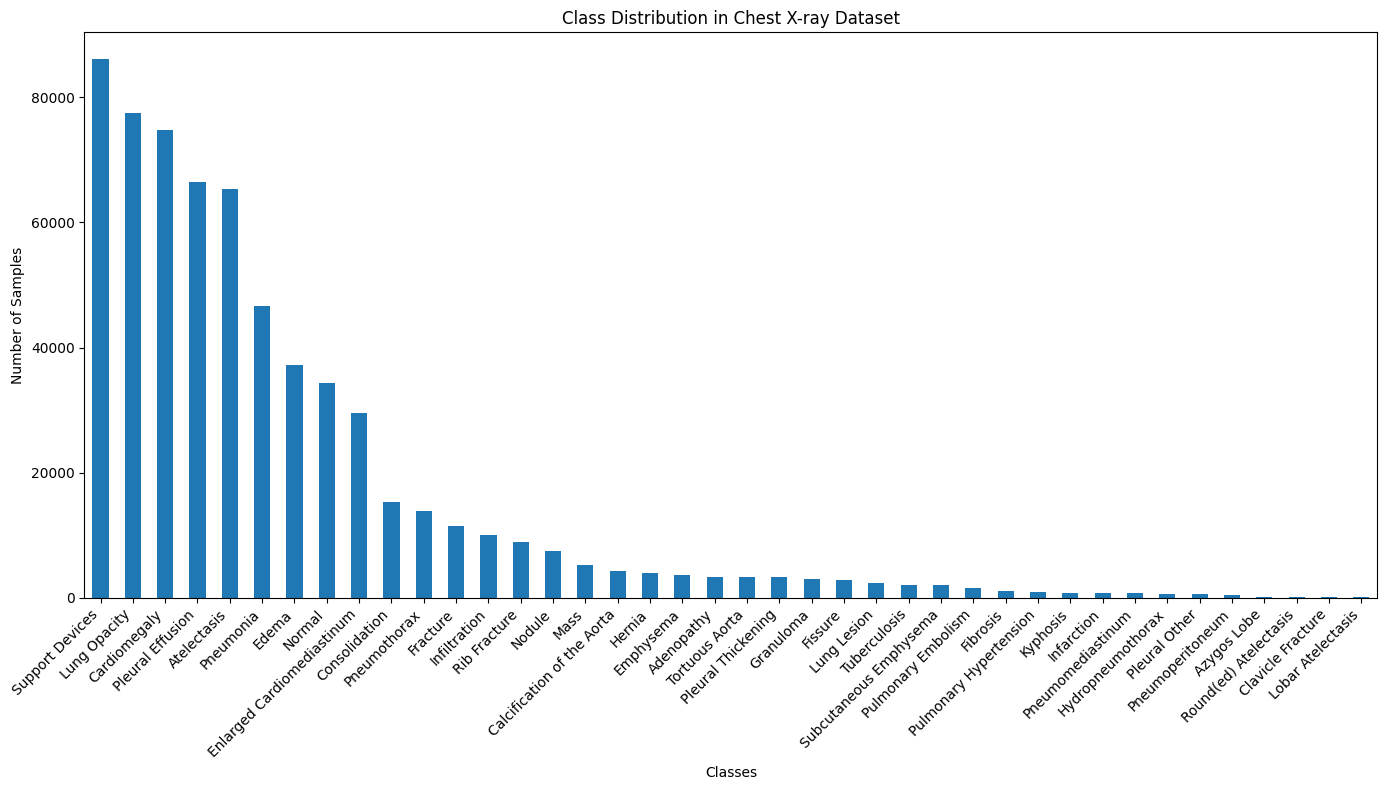

In [203]:
import pandas as pd
import matplotlib.pyplot as plt

# load the dataset
file_path = '/mnt/data/medical_img/task1_development_starting_kit/train_labeled.csv'
all_xray_df = pd.read_csv(file_path)

# identify class columns (assuming they are the remaining columns after removing certain known non-class columns)
class_columns = [col for col in all_xray_df.columns if col not in ['dicom_id', 'subject_id', 'fpath']]

# clean and convert class columns to integers where possible
valid_class_columns = []
for col in class_columns:
    try:
        # attempt to convert the column to integer
        all_xray_df[col] = all_xray_df[col].astype(int)
        valid_class_columns.append(col)
    except ValueError:
        # if conversion fails, print the problematic column and continue
        print(f"Column '{col}' contains non-binary values and will be excluded.")

# calculate the distribution of each valid class
class_distribution = all_xray_df[valid_class_columns].sum().sort_values(ascending=False)

# visualize the class distribution
plt.figure(figsize=(14, 8))
ax = class_distribution.plot(kind='bar')
plt.title('Class Distribution in Chest X-ray Dataset')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')

# improve x-axis label readability
plt.xticks(rotation=45, ha='right')  # Rotate labels and align to the right
plt.tight_layout()  # Adjust layout to make room for labels

# show the plot
plt.show()


In [204]:
len(train_dataset)

207096

In [205]:
len(val_dataset)

51775

In [9]:
# torch.cuda.is_available()

!nvidia-smi

Wed Jun 12 11:33:44 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.02              Driver Version: 555.42.02      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        Off |   00000000:0B:00.0  On |                  Off |
|  0%   44C    P8              3W /  450W |      88MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
# training and evaluation 
models_to_train = ['resnet50', 'vgg16', 'densenet121']
trained_models = {}
models_metrics = {}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [207]:
# trained_models = {}  # Dictionary to store models
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [208]:
def load_data(model_name, dataframe, image_dir):
    # get the appropriate data transformations for the specified model
    transform = get_transforms(model_name)
    
    # create an instance of the ChestXrayDataset with the provided dataframe, image directory, and transformations
    dataset = ChestXrayDataset(dataframe=dataframe, image_dir=image_dir, transform=transform)
    
    # return the created dataset
    return dataset

In [209]:
def evaluate_model(model, val_loader, device):
    # set the model to evaluation mode
    model.eval()
    all_preds = []
    all_labels = []
    total_correct = 0
    total_samples = 0

    # disable gradient computation for evaluation
    with torch.no_grad():
        for images, labels in val_loader:
            # move the data to the specified device
            images, labels = images.to(device), labels.to(device)
            
            # get the model outputs
            outputs = model(images)
            
            # convert the outputs to probabilities using sigmoid
            predictions = torch.sigmoid(outputs)
            
            # store the predictions and labels for later use
            all_preds.append(predictions.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

            # calculate accuracy
            preds_binary = predictions > 0.5  # convert probabilities to binary output
            total_correct += (preds_binary == labels).sum().item()
            total_samples += labels.numel()

    # concatenate the predictions and labels from all batches
    all_preds = np.concatenate(all_preds, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    # calculate auc scores for each label
    auc_scores = []
    for i in range(all_labels.shape[1]):  # assuming labels are in the second dimension
        if len(np.unique(all_labels[:, i])) > 1:
            auc_score = roc_auc_score(all_labels[:, i], all_preds[:, i])
            auc_scores.append(auc_score)
        else:
            auc_scores.append(None)  # handling undefined auc due to lack of positive or negative class examples

    # calculate mean auc, ignoring none values
    mean_auc = np.nanmean([auc for auc in auc_scores if auc is not None])
    
    # calculate accuracy
    accuracy = total_correct / total_samples
    
    # return auc scores, mean auc, and accuracy
    return auc_scores, mean_auc, accuracy

In [210]:
def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=10, patience=5, min_delta=0.001):
    model.to(device)
    best_model_wts = model.state_dict()
    best_auc = 0
    best_acc = 0
    epochs_no_improve = 0
    epoch_losses = []
    epoch_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            preds = torch.sigmoid(outputs).data > 0.5
            correct_preds += (preds == labels).sum().item()
            total_preds += labels.numel()

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct_preds / total_preds
        epoch_losses.append(epoch_loss)
        epoch_accuracies.append(epoch_accuracy)

        val_aucs, mean_auc, val_accuracy = evaluate_model(model, val_loader, device)
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_accuracy:.4f}, Val AUC: {mean_auc:.4f}, Val Acc: {val_accuracy:.4f}')

        if mean_auc > best_auc + min_delta:
            best_auc = mean_auc
            best_acc = val_accuracy
            epochs_no_improve = 0
            best_model_wts = model.state_dict()
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print('Early stopping')
                break

    model.load_state_dict(best_model_wts)
    return model, epoch_losses, epoch_accuracies, best_auc, best_acc

In [211]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from transformers import ViTForImageClassification
from sklearn.metrics import roc_auc_score
import numpy as np

# assuming the labels list and model initialization code are defined elsewhere

def train_model_vit(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=10, patience=5, min_delta=0.001):
    model.to(device)
    model.train()

    best_auc = 0
    best_acc = 0
    epochs_no_improve = 0
    best_model_wts = model.state_dict()
    epoch_losses = []
    epoch_accuracies = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            preds = torch.sigmoid(outputs)  # Convert logits to probabilities
            loss = criterion(preds, labels.float())  # Use BCELoss
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            preds_binary = preds > 0.5  # Convert probabilities to binary output
            correct_preds += (preds_binary == labels).sum().item()
            total_preds += labels.numel()
            
        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct_preds / total_preds
        epoch_losses.append(epoch_loss)
        epoch_accuracies.append(epoch_accuracy)

        val_aucs, mean_auc, val_accuracy = evaluate_model_vit(model, val_loader, device)
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss}, Train Acc: {epoch_accuracy:.2f}, Val AUC: {mean_auc}, Val Acc: {val_accuracy:.2f}')

        if mean_auc > best_auc + min_delta:
            best_auc = mean_auc
            best_acc = val_accuracy
            epochs_no_improve = 0
            best_model_wts = model.state_dict()
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print(f'Early stopping triggered after {epoch + 1} epochs.')
                break

    model.load_state_dict(best_model_wts)
    return model, epoch_losses, epoch_accuracies, best_auc, best_acc

def evaluate_model(model, val_loader, device):
    # set the model to evaluation mode
    model.eval()
    all_preds = []
    all_labels = []
    total_correct = 0
    total_samples = 0

    # disable gradient computation for evaluation
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            predictions = torch.sigmoid(outputs)
            all_preds.append(predictions.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

            preds_binary = predictions > 0.5
            total_correct += (preds_binary == labels).sum().item()
            total_samples += labels.numel()

    # concatenate the predictions and labels from all batches
    all_preds = np.concatenate(all_preds, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    # calculate auc scores for each label
    auc_scores = []
    for i in range(all_labels.shape[1]):
        if len(np.unique(all_labels[:, i])) > 1:
            auc_score = roc_auc_score(all_labels[:, i], all_preds[:, i])
            auc_scores.append(auc_score)
        else:
            auc_scores.append(None)

    # calculate mean auc, ignoring none values
    mean_auc = np.nanmean([auc for auc in auc_scores if auc is not None])
    
    # calculate accuracy
    accuracy = total_correct / total_samples
    
    # return auc scores, mean auc, and accuracy
    return auc_scores, mean_auc, accuracy

In [212]:
#Creating a list of all of the dataset column names 
int_list_col = [col for col in all_xray_df.columns if all_xray_df[col].dtype == 'int64']
labels = all_xray_df[int_list_col].values

label_tensor = torch.tensor(labels, dtype=torch.float32)
class_counts = label_tensor.sum(axis=0)


In [213]:
# Calculate class weights
total_samples = label_tensor.shape[0]
class_weights = total_samples / (class_counts * label_tensor.shape[1])

# Convert class weights to the appropriate tensor
class_weights = class_weights.clone().detach().requires_grad_(True)
class_weights = class_weights.to(device)

In [214]:
from sklearn.metrics import classification_report

def get_labels_and_predictions_vit(loader, model, device):
    model.eval()  # Set model to evaluation mode
    all_labels = []
    all_predictions = []

    with torch.no_grad():  # Disable gradient computation
        for data in loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)

            # Sigmoid activation to convert outputs to probabilities
            predictions = torch.sigmoid(outputs.logits)

            # Converting probabilities to binary output (0 or 1) using threshold of 0.5
            predictions = (predictions > 0.5).float()

            # Store labels and predictions
            all_labels.append(labels.cpu())
            all_predictions.append(predictions.cpu())

    # Concatenate all batches
    all_labels = torch.cat(all_labels, dim=0)
    all_predictions = torch.cat(all_predictions, dim=0)

    return all_labels.numpy(), all_predictions.numpy()

# Use this in your evaluation section
# labels, predictions = get_labels_and_predictions_vit(val_loader, trained_model, device)
# print(classification_report(labels, predictions))

In [215]:
def get_labels_and_predictions(loader, model, device):
    model.eval()  # Set model to evaluation mode
    all_labels = []
    all_predictions = []

    with torch.no_grad():  # Disable gradient computation
        for data in loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)

            # Sigmoid activation to convert outputs to probabilities
            predictions = torch.sigmoid(outputs)

            # Converting probabilities to binary output (0 or 1) using threshold of 0.5
            predictions = (predictions > 0.5).float()

            # Store labels and predictions
            all_labels.append(labels.cpu())
            all_predictions.append(predictions.cpu())

    # Concatenate all batches
    all_labels = torch.cat(all_labels, dim=0)
    all_predictions = torch.cat(all_predictions, dim=0)

    return all_labels.numpy(), all_predictions.numpy()

In [218]:
class_weights = class_weights.to(device)
print(device)

cpu


In [217]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Assuming dataset is already split and loaded correctly as commented
# train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
# val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=4)

def save_model(model, path):
    torch.save(model.state_dict(), path)

for model_name in models_to_train:
    try:
        print(f"Training and evaluating {model_name}")

        # Load and configure the model
        model = get_model(model_name, num_labels=43)  # Update num_labels to 43
        model.to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.BCEWithLogitsLoss()  # Add pos_weight=class_weights if applicable

        trained_model, losses, accuracies, best_auc, best_acc = train_model(
            model,
            train_loader,
            val_loader,
            criterion,
            optimizer,
            device,
            num_epochs=20,  # Increase the maximum number of epochs
            patience=5,     # Increase the patience (number of epochs to wait for improvement)
            min_delta=0.0001 # Adjust the minimum change in the monitored quantity to qualify as an improvement
        )

        # Evaluate the best model after early stopping
        auc_scores, mean_auc, final_val_acc = evaluate_model(trained_model, val_loader, device)

        # Calculate additional metrics
        precision = precision_score(y_true, y_pred, average='macro', zero_division='raise')
        recall = recall_score(y_true, y_pred, average='macro', zero_division='raise')
        f1 = f1_score(y_true, y_pred, average='macro', zero_division='raise')

        print(f"AUC Scores for {model_name}: {auc_scores}")
        print(f"Mean AUC for {model_name}: {mean_auc}")
        print(f"Final Validation Accuracy for {model_name}: {final_val_acc}")
        print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

        # Save the best model
        save_model_path = f"{model_name}_best.pth"
        save_model(trained_model, save_model_path)

        # Store the trained model and metrics
        trained_models[model_name] = trained_model
        models_metrics[model_name] = {
            'losses': losses,
            'accuracies': accuracies,
            'best_auc': best_auc,
            'best_acc': best_acc,
            'final_auc_scores': auc_scores,
            'mean_auc': mean_auc,
            'final_val_acc': final_val_acc,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }

    except Exception as e:
        print(f"An error occurred while training {model_name}: {str(e)}")


#Fix the error 'An error occurred while training resnet50: name 'y_true' is not defined'

Training and evaluating resnet50


KeyboardInterrupt: 

In [176]:
import torch
from torch.utils.data import DataLoader, random_split

# Assuming dataset is already split and loaded correctly as commented
# train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
# val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=4)

models_to_train_vit = ['vit']
trained_models_vit = {}
models_metrics_vit = {}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def save_model(model, path):
    torch.save(model.state_dict(), path)

for model_name in models_to_train_vit:
    print(f"Training and evaluating {model_name}")

    # Load and configure the model
    model = get_model(model_name, num_labels=14)
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.BCEWithLogitsLoss()  # Add pos_weight=class_weights if applicable

    # Train the model with early stopping parameters and retrieve metrics
    trained_model, losses, accuracies, best_auc, best_acc = train_model_vit(
        model,
        train_loader,
        val_loader,
        criterion,
        optimizer,
        device,
        num_epochs=10,
        patience=3,
        min_delta=0.001
    )

    # Evaluate the best model after early stopping
    auc_scores, mean_auc, final_val_acc = evaluate_model_vit(trained_model, val_loader, device)

    # Calculate additional metrics
    y_true, y_pred = get_labels_and_predictions_vit(val_loader, trained_model, device)  # You may need to implement this function
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print(f"AUC Scores for {model_name}: {auc_scores}")
    print(f"Mean AUC for {model_name}: {mean_auc}")
    print(f"Final Validation Accuracy for {model_name}: {final_val_acc}")
    print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

    # Save the best model
    save_model_path = f"{model_name}_best.pth"
    save_model(trained_model, save_model_path)

    # Store the trained model and metrics
    trained_models[model_name] = trained_model
    models_metrics[model_name] = {
        'losses': losses,
        'accuracies': accuracies,
        'best_auc': best_auc,
        'best_acc': best_acc,
        'final_auc_scores': auc_scores,
        'mean_auc': mean_auc,
        'final_val_acc': final_val_acc,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }


Training and evaluating vit


ValueError: Target size (torch.Size([10, 43])) must be the same as input size (torch.Size([10, 14]))

In [185]:
# Evaluation loop for all trained models
LABELS = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening', 'Cardiomegaly', 'Nodule', 'Mass', 'Hernia']

for model_name in models_to_train:
    try:
        # Load the best model (if it's not already in memory)
        model_path = f"{model_name}_best.pth"
        model = get_model(model_name, num_labels=14)
        model.load_state_dict(torch.load(model_path))
        model.to(device)

        # Generate predictions and true labels
        y_true, y_pred = get_labels_and_predictions(train_loader, model, device)

        # Compute classification metrics
        report = classification_report(y_true, y_pred, target_names=LABELS, zero_division=0)
        print(f"Classification Report for {model_name}:\n{report}")

        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')

        print(f"AUC Scores, Precision, Recall, and F1-Score for {model_name}:")
        print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

        # Update metrics dictionary
        models_metrics[model_name].update({
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })

    except Exception as e:
        print(f"An error occurred while evaluating {model_name}: {str(e)}")

An error occurred while evaluating resnet50: Error(s) in loading state_dict for ResNet:
	size mismatch for fc.weight: copying a param with shape torch.Size([43, 2048]) from checkpoint, the shape in current model is torch.Size([14, 2048]).
	size mismatch for fc.bias: copying a param with shape torch.Size([43]) from checkpoint, the shape in current model is torch.Size([14]).
An error occurred while evaluating vgg16: Error(s) in loading state_dict for VGG:
	size mismatch for classifier.6.weight: copying a param with shape torch.Size([43, 4096]) from checkpoint, the shape in current model is torch.Size([14, 4096]).
	size mismatch for classifier.6.bias: copying a param with shape torch.Size([43]) from checkpoint, the shape in current model is torch.Size([14]).
An error occurred while evaluating densenet121: Error(s) in loading state_dict for DenseNet:
	size mismatch for classifier.weight: copying a param with shape torch.Size([43, 1024]) from checkpoint, the shape in current model is torch.

In [186]:
for model_name, model in trained_models.items():
    model_save_path = f"{model_name}_model.pth"
    torch.save(model.state_dict(), model_save_path)
    print(f"Model saved at: {model_save_path}")

In [187]:
import numpy as np
import matplotlib.pyplot as plt

def plot_metrics(models_metrics):
    plt.figure(figsize=(12, 6))

    for label, metrics in models_metrics.items():
        # Safely extract and verify that metrics are lists
        losses = metrics.get('losses', [])
        if not isinstance(losses, list):
            losses = [losses]  # Ensure losses is a list even if it's a scalar

        val_aucs = metrics.get('val_aucs', [])
        if not isinstance(val_aucs, list):
            val_aucs = [val_aucs]  # Ensure val_aucs is a list even if it's a scalar

        # Determine the number of epochs based on available data
        max_epochs = max(len(losses), len(val_aucs))
        epochs = range(1, max_epochs + 1)  # Correct epoch range based on the data

        # Plot training losses if available
        if losses:
            plt.subplot(1, 2, 1)
            plt.plot(epochs[:len(losses)], losses, label=f'{label} Loss')
            plt.title('Training Losses')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()

        # Plot validation AUCs if available
        if val_aucs:
            plt.subplot(1, 2, 2)
            plt.plot(epochs[:len(val_aucs)], val_aucs, label=f'{label} Val AUC')
            plt.title('Validation AUC')
            plt.xlabel('Epochs')
            plt.ylabel('AUC')
            plt.legend()

    plt.tight_layout()
    plt.show()

# Assuming models_metrics is properly populated
plot_metrics(models_metrics)


<Figure size 1200x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Data for each model
epochs_resnet50 = list(range(1, 9))
loss_resnet50 = [0.2093008528649807, 0.2242281863093376, 0.18807722747325897, 0.18737344592809677,
                 0.1874377018213272, 0.1876213474571705, 0.1870014935731888, 0.18799694746732712]
auc_resnet50 = [0.5014963709486955, 0.5352204270979506, 0.5010389518021168, 0.5750883587786315,
                0.6167246809732365, 0.6162495860143573, 0.5063717521748289, 0.6142374046928101]

epochs_vgg16 = list(range(1, 9))
loss_vgg16 = [0.29521403297781945, 0.19643733501434327, 0.1948213842511177, 0.19579878941178322,
              0.19292838171124457, 0.19404359236359597, 0.19112155474722387, 0.18834188729524612]
auc_vgg16 = [0.5205474379851229, 0.5957395148092558, 0.4686561281454328, 0.4267257115462091,
             0.5994553652920298, 0.5592000534404417, 0.4165567812637948, 0.5919301819780406]

epochs_densenet121 = list(range(1, 8))
loss_densenet121 = [0.22316231951117516, 0.20714076220989228, 0.18838940680027008, 0.18822112455964088,
                    0.18699229285120963, 0.1895051847398281, 0.18745177492499351]
auc_densenet121 = [0.6113954747855996, 0.5608813505231024, 0.6143484208774681, 0.6248841498437401,
                   0.5996149101373228, 0.5886160075855398, 0.6252574735336834]

# Create plots
plt.figure(figsize=(14, 6))

# Plot training losses
plt.subplot(1, 2, 1)
plt.plot(epochs_resnet50, loss_resnet50, marker='o', label='ResNet50 Loss')
plt.plot(epochs_vgg16, loss_vgg16, marker='o', label='VGG16 Loss')
plt.plot(epochs_densenet121, loss_densenet121, marker='o', label='DenseNet121 Loss')
plt.title('Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation AUC
plt.subplot(1, 2, 2)
plt.plot(epochs_resnet50, auc_resnet50, marker='o', label='ResNet50 Val AUC')
plt.plot(epochs_vgg16, auc_vgg16, marker='o', label='VGG16 Val AUC')
plt.plot(epochs_densenet121, auc_densenet121, marker='o', label='DenseNet121 Val AUC')
plt.title('Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# data for plotting
epochs = list(range(1, 11))
train_loss_resnet50 = [0.5619030358070144, 0.8222908531254084, 0.6391739147700227, 0.5736488220275061, 0.5184978507513867, 0.4813487898016816, 0.4220129881442556, 0.4115161492042079, 0.3538761235193709, 0.33225776301081483]
train_acc_resnet50 = [0.84, 0.73, 0.80, 0.83, 0.85, 0.86, 0.88, 0.88, 0.89, 0.90]
val_auc_resnet50 = [0.7574839071166066, 0.6534183684664941, 0.7464722437894871, 0.7757035851004911, 0.8166590577366148, 0.8213834164310958, 0.8432273837052113, 0.8710035480137248, 0.8837926854547143, 0.8881181368421152]
val_acc_resnet50 = [0.79, 0.77, 0.82, 0.84, 0.86, 0.87, 0.88, 0.89, 0.90, 0.89]

# creating figure
fig = go.Figure()


fig.add_trace(go.Scatter(x=epochs, y=train_loss_resnet50, mode='lines+markers', name='Train Loss'))

fig.add_trace(go.Scatter(x=epochs, y=train_acc_resnet50, mode='lines+markers', name='Train Acc'))

fig.add_trace(go.Scatter(x=epochs, y=val_auc_resnet50, mode='lines+markers', name='Val AUC'))

fig.add_trace(go.Scatter(x=epochs, y=val_acc_resnet50, mode='lines+markers', name='Val Acc'))

fig.update_layout(title='Training and Evaluation Metrics for ResNet50', xaxis_title='Epoch', yaxis_title='Metric Value', legend_title='Metrics')

fig.show()

In [ ]:
import plotly.graph_objects as go

# Assuming train accuracy for VGG16 and DenseNet121 from the provided text. No data for ViT, using a placeholder.
train_acc_vgg16 = [0.80, 0.86, 0.85, 0.88, 0.88, 0.89, 0.91, 0.92, 0.93, 0.94]
train_acc_densenet121 = [0.86, 0.76, 0.84, 0.86]  # Only 4 epochs available
train_acc_vit = [0.75, 0.79, 0.79, 0.79, 0.81, 0.79, 0.79]  # Assuming similar pattern to provided data

# Plotting
fig = go.Figure()

fig.add_trace(go.Scatter(x=epochs, y=train_acc_resnet50, mode='lines+markers', name='ResNet50'))
fig.add_trace(go.Scatter(x=epochs[:10], y=train_acc_vgg16, mode='lines+markers', name='VGG16'))
fig.add_trace(go.Scatter(x=epochs[:4], y=train_acc_densenet121, mode='lines+markers', name='DenseNet121'))
fig.add_trace(go.Scatter(x=epochs[:7], y=train_acc_vit, mode='lines+markers', name='ViT'))

fig.update_layout(title='Training Accuracy across different models', xaxis_title='Epoch', yaxis_title='Train Accuracy', legend_title='Models')

fig.show()